# **TSF GRIP - Data Science & Business analytics**
## Nada Saeed Abdel Hafez Abdel Samee

## **Task 1 - Prediction using supervised ML**
This is a simple linear regression model of two variables that predicts the grade percentage of students based on the number of hours studied only.

We will be using *Python Scikit-Learn library for machine learning* for this model.

In [63]:
#importing libraries

import pandas as pd
import numpy as np

## **Importing and preparing data**

In [64]:
#reading in the data from link

grades = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

grades

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [65]:
#summary of data

grades.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


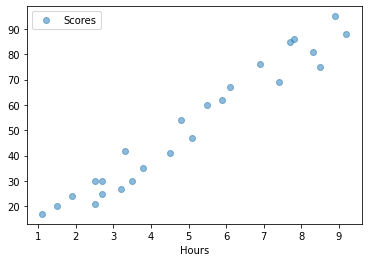

In [66]:
#ploting data in a scatterplot graph where we have the hours studied on the X-axis and the students' scores on the Y-axis

grades.plot(x='Hours', y='Scores', style='o', alpha=0.5)


In [67]:
#preparing the data by assigning the inputs to the 'X' variable and outputs to 'y' variable

X = grades.iloc[:, :-1]
y = grades.iloc[:, -1]

In [68]:
#importing from library

from sklearn.model_selection import train_test_split

In [69]:
#splitting the data into training and testing datasets with sizes 0.8, 0.2 respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, y_train.shape

((20, 1), (20,))

In [86]:
#importing from libraries

from sklearn.linear_model import LinearRegression  
# from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## **Linear regression model**

In [87]:
#defining the linear regression model

model = LinearRegression()

In [88]:
#building the training model

model.fit(X_train, y_train)

LinearRegression()

In [89]:
#what the linear regression equation looks like (y = 3.6343277239503564 + 9.52121933X )

Xcoef = model.coef_
y_intercept = model.intercept_

regression_eq = X*Xcoef + y_intercept

In [90]:
#importing libraries

import matplotlib.pyplot as plt  

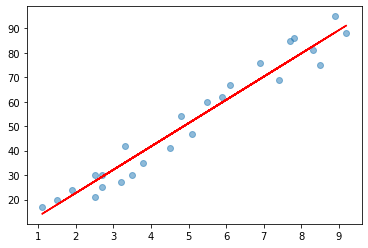

In [91]:
#importing the linear regression line in red against the grades dataset

plt.scatter(X, y, alpha=0.5)
plt.plot(X, regression_eq, color='red')

In [92]:
#applying model to predict on test dataset

y_pred = model.predict(X_test)

y_pred

array([59.80952179, 39.81496119, 76.94771658, 49.33618052, 36.95859539])

In [93]:
#comparing predicted output vs actual output

df = pd.DataFrame({'Actual output': y_test, 'Predicted output': y_pred, 'Differnce': y_pred-y_test})

df

,Actual output,Predicted output,Differnce
11,62,59.809522,-2.190478
22,35,39.814961,4.814961
10,85,76.947717,-8.052283
21,54,49.336181,-4.663819
4,30,36.958595,6.958595


## **The predicted score if a student studies 9.25hr/ day**

In [107]:
x = np.asarray(9.25).reshape(1,-1)

my_pred = model.predict(x)

print("The predicted score for this student is {}".format(my_pred))

The predicted score for this student is [91.70560655]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## **Evaluating the model's performance:**

In [108]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 32.60
Coefficient of determination (R^2): 0.92
